# Time sereis ANN Model

In [1]:
import pandas as pd
df = pd.read_csv('time_series_data.csv', index_col = [0])
df.head()

,time,sereis
0,0.0,27.980286
1,1.0,24.258190
2,2.0,29.057243
3,3.0,34.388184
4,4.0,23.919535


In [2]:
input = []
target = []

values = df['sereis'].values
window_size = 5

for i in range(len(values) - window_size):
    x = values[i:window_size + i]
    y = values[window_size + i]
    input.append(x)
    target.append(y)

In [3]:
import numpy as np
input = np.array(input)
target = np.array(target).reshape(-1, 1)
print(input.shape)
print(target.shape)

(1456, 5)
(1456, 1)


In [4]:
test_size = 100
split_idx = len(input) - test_size
print(split_idx)

X_train = input[:split_idx]
X_test = input[split_idx:]
y_train = target[:split_idx]
y_test = target[split_idx:]

1356


In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
model = Sequential()
model.add(Dense(10, input_shape = [window_size], activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'linear')) # ANN 모델로 만들어주고

adam = tf.keras.optimizers.Adam(0.000001)
model.compile(loss = 'mse', optimizer = adam)
history = model.fit(X_train, y_train, epochs = 20)

Epoch 1/20
43/43 [==============================] - 1s 6ms/step - loss: 2358.7744
Epoch 2/20
43/43 [==============================] - 0s 2ms/step - loss: 2353.5046
Epoch 3/20
43/43 [==============================] - 0s 2ms/step - loss: 2348.2849
Epoch 4/20
43/43 [==============================] - 0s 2ms/step - loss: 2343.0723
Epoch 5/20
43/43 [==============================] - 0s 2ms/step - loss: 2337.8823
Epoch 6/20
43/43 [==============================] - 0s 2ms/step - loss: 2332.7209
Epoch 7/20
43/43 [==============================] - 0s 2ms/step - loss: 2327.5723
Epoch 8/20
43/43 [==============================] - 0s 2ms/step - loss: 2322.4304
Epoch 9/20
43/43 [==============================] - 0s 2ms/step - loss: 2317.2729
Epoch 10/20
43/43 [==============================] - 0s 2ms/step - loss: 2312.1738
Epoch 11/20
43/43 [==============================] - 0s 2ms/step - loss: 2307.0801
Epoch 12/20
43/43 [==============================] - 0s 2ms/step - loss: 2301.9778
Epoch 13/20
4

### 모델평가

In [6]:
model_prediction = model.predict([X_test])

4/4 [==============================] - 0s 2ms/step


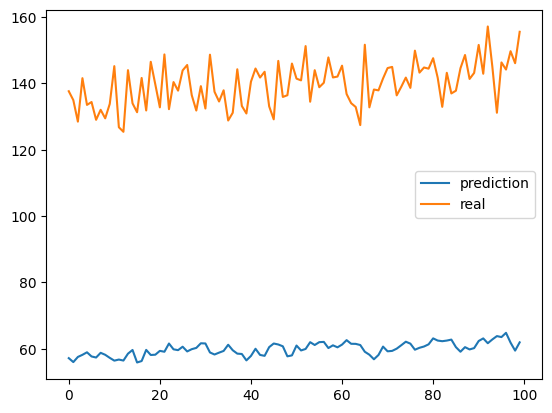

In [7]:
import matplotlib.pyplot as plt
plt.plot(model_prediction, label = 'prediction')
plt.plot(y_test, label = 'real')
plt.legend()

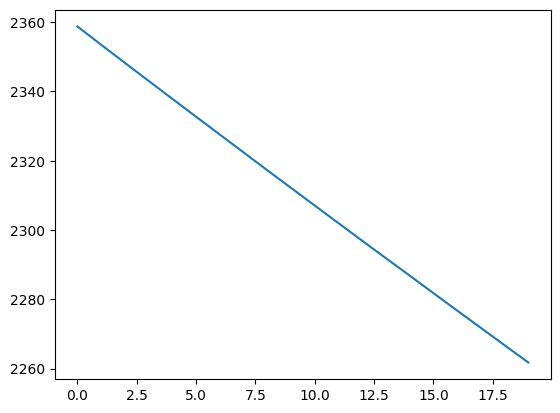

In [8]:
plt.plot(history.history['loss'])

### learning rate 가 작아서 너무 늦었다. -> Loss가 수렴하지 못했다. 
1. 해결방법. 
- learning rate를 높여서 다시학습.
- learning rate를 점차 높인다

In [9]:
# learning rate를 점차 높인다.

In [10]:
learning_rate_callback = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-8 * 10 ** (epoch/20)) # learning rate를 점차 높인다. # learning rate를 점차 높인다.

In [11]:
for epoch in range(1, 30):
    print(epoch, 'learning rate : ', 1e-8 * 10 ** (epoch/20))

1 learning rate :  1.1220184543019634e-08
2 learning rate :  1.2589254117941673e-08
3 learning rate :  1.4125375446227544e-08
4 learning rate :  1.5848931924611136e-08
5 learning rate :  1.7782794100389228e-08
6 learning rate :  1.9952623149688796e-08
7 learning rate :  2.2387211385683395e-08
8 learning rate :  2.51188643150958e-08
9 learning rate :  2.8183829312644537e-08
10 learning rate :  3.16227766016838e-08
11 learning rate :  3.548133892335755e-08
12 learning rate :  3.981071705534972e-08
13 learning rate :  4.466835921509632e-08
14 learning rate :  5.011872336272722e-08
15 learning rate :  5.623413251903491e-08
16 learning rate :  6.309573444801934e-08
17 learning rate :  7.079457843841378e-08
18 learning rate :  7.943282347242815e-08
19 learning rate :  8.912509381337454e-08
20 learning rate :  1e-07
21 learning rate :  1.1220184543019637e-07
22 learning rate :  1.2589254117941675e-07
23 learning rate :  1.4125375446227541e-07
24 learning rate :  1.5848931924611133e-07
25 lear

In [12]:
model2 = Sequential()
model2.add(Dense(10, input_shape = [window_size], activation = 'relu'))
model2.add(Dense(10, activation = 'relu'))
model2.add(Dense(1, activation = 'linear')) 
adam = tf.keras.optimizers.Adam(0.000001)
model2.compile(loss = 'mse', optimizer = adam)
history2 = model2.fit(X_train, y_train, epochs = 100, callbacks = [learning_rate_callback])

Epoch 1/100
43/43 [==============================] - 1s 2ms/step - loss: 18831.3711 - lr: 1.0000e-08
Epoch 2/100
43/43 [==============================] - 0s 2ms/step - loss: 18831.2793 - lr: 1.1220e-08
Epoch 3/100
43/43 [==============================] - 0s 2ms/step - loss: 18831.1836 - lr: 1.2589e-08
Epoch 4/100
43/43 [==============================] - 0s 2ms/step - loss: 18831.0801 - lr: 1.4125e-08
Epoch 5/100
43/43 [==============================] - 0s 2ms/step - loss: 18830.8320 - lr: 1.5849e-08
Epoch 6/100
43/43 [==============================] - 0s 2ms/step - loss: 18830.4219 - lr: 1.7783e-08
Epoch 7/100
43/43 [==============================] - 0s 2ms/step - loss: 18830.0020 - lr: 1.9953e-08
Epoch 8/100
43/43 [==============================] - 0s 2ms/step - loss: 18829.5605 - lr: 2.2387e-08
Epoch 9/100
43/43 [==============================] - 0s 2ms/step - loss: 18829.0977 - lr: 2.5119e-08
Epoch 10/100
43/43 [==============================] - 0s 2ms/step - loss: 18828.5938 - lr: 

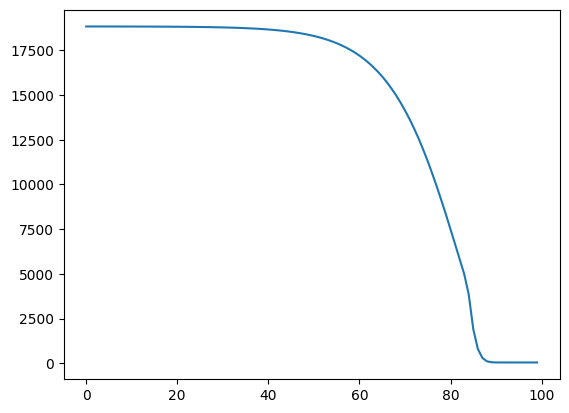

In [13]:
plt.plot(range(len(history2.history['loss'])),history2.history['loss'])

In [14]:
# 슈팅 된 케이스 설명. 
# 슈팅이 필요한 이유? -> 글러벌 미니멈을 찾기 위해, 로컬 미니멈에 빠지지 않게



In [15]:
y_pred = model2.predict(X_test)

4/4 [==============================] - 0s 2ms/step


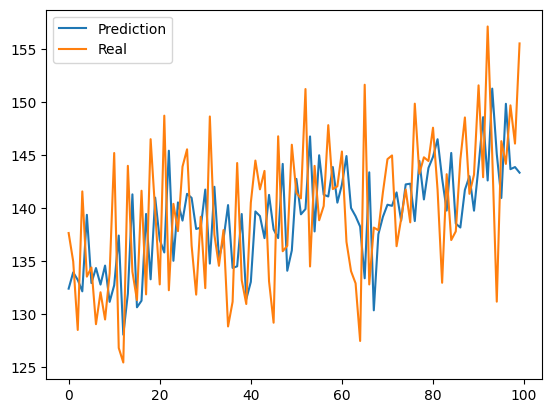

In [16]:
plt.plot(y_pred, label = 'Prediction')
plt.plot(y_test, label = 'Real')
plt.legend()

# Hyperparameter Tuning

In [17]:
!pip install Keras-tuner


[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
# keras tuner를 활용하여 model을 만들기 위한 builder
# dense층의 layer 유닛 개수를 수정 -> 어디서부터 어디까지(10~30)
# lr값을 수정 -> 어디서부터 어디까지
# builder : 위의 정보를 포함하는 것.

In [19]:
def model_builder(hp):
    model = Sequential()
    layer_units = hp.Int('units', min_value = 10, max_value = 30, step = 2) # 유닛에 대한 객체를 만들어 준다음 model.add(Dense(units, activation = 'relu'))
    model.add(Dense(layer_units, activation = 'relu', input_shape = [window_size]))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(1, activation = 'linear'))
    hp_lr = hp.Choice('learning_rate', values = [0.0001, 0.001, 0.01]) 
    model.compile(loss = 'mse', optimizer = tf.keras.optimizers.Adam(hp_lr))
    return model

In [20]:
from keras_tuner.tuners import RandomSearch

tuner = RandomSearch(model_builder,
                     objective = 'loss', max_trials = 150,
                     executions_per_trial = 3, directory = 'dir',
                     project_name = 'search_hp', overwrite = True)

In [21]:
tuner.search(X_train, y_train, epochs = 30)

Trial 31 Complete [00h 00m 13s]
loss: 44.775708516438804

Best loss So Far: 44.13428243001302
Total elapsed time: 00h 06m 46s
INFO:tensorflow:Oracle triggered exit


In [22]:
tuner.results_summay()

AttributeError: 'RandomSearch' object has no attribute 'results_summay'

In [ ]:
best_models = tuner.get_best_models(num_models = 4)

In [ ]:
model = best_models[0]

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
plt.plot(y_pred, label = 'Prediction')
plt.plot(y_test, label = 'Real')
plt.legend()

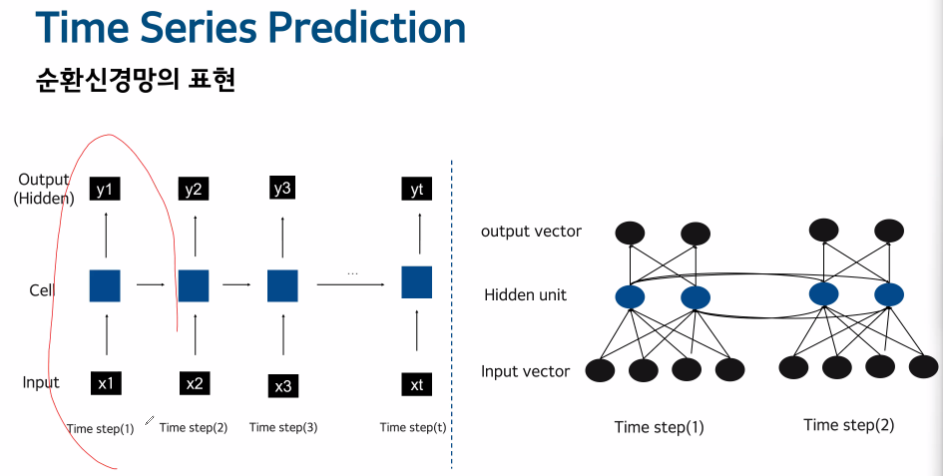

In [ ]:
# hidden unit 과 output vector와 갯수가 같다.